<a href="https://colab.research.google.com/github/LakshmikanthGopi/Guvi-Assignment/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Data Preprocessing**

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as st
import statistics as s

import plotly.express as px

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

from scipy.sparse import csr_matrix
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#Train data
df1 = pd.read_csv("https://raw.githubusercontent.com/LakshmikanthGopi/Datasets/main/trainKNN.txt",sep=",",header=None,
                       names=["oxide_1","oxide_2","oxide_3","oxide_4","oxide_5","oxide_6","oxide_7","oxide_8","oxide_9","oxide_10","oxide_11"])
df1.head()



,oxide_1,oxide_2,oxide_3,oxide_4,oxide_5,oxide_6,oxide_7,oxide_8,oxide_9,oxide_10,oxide_11
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   oxide_1   196 non-null    int64  
 1   oxide_2   196 non-null    float64
 2   oxide_3   196 non-null    float64
 3   oxide_4   196 non-null    float64
 4   oxide_5   196 non-null    float64
 5   oxide_6   196 non-null    float64
 6   oxide_7   196 non-null    float64
 7   oxide_8   196 non-null    float64
 8   oxide_9   196 non-null    float64
 9   oxide_10  196 non-null    float64
 10  oxide_11  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [17]:
df1.isnull().sum()

oxide_1     0
oxide_2     0
oxide_3     0
oxide_4     0
oxide_5     0
oxide_6     0
oxide_7     0
oxide_8     0
oxide_9     0
oxide_10    0
oxide_11    0
dtype: int64

In [18]:
df1.describe()

,oxide_1,oxide_2,oxide_3,oxide_4,oxide_5,oxide_6,oxide_7,oxide_8,oxide_9,oxide_10,oxide_11
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [19]:
#Test Data
df2 = pd.read_csv("https://raw.githubusercontent.com/LakshmikanthGopi/Datasets/main/testKNN.txt",sep=",",header=None,
                       names=["oxide_1","oxide_2","oxide_3","oxide_4","oxide_5","oxide_6","oxide_7","oxide_8","oxide_9","oxide_10","oxide_11"])
df2.head()


,oxide_1,oxide_2,oxide_3,oxide_4,oxide_5,oxide_6,oxide_7,oxide_8,oxide_9,oxide_10,oxide_11
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   oxide_1   18 non-null     int64  
 1   oxide_2   18 non-null     float64
 2   oxide_3   18 non-null     float64
 3   oxide_4   18 non-null     float64
 4   oxide_5   18 non-null     float64
 5   oxide_6   18 non-null     float64
 6   oxide_7   18 non-null     float64
 7   oxide_8   18 non-null     float64
 8   oxide_9   18 non-null     float64
 9   oxide_10  18 non-null     float64
 10  oxide_11  18 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 KB


In [21]:
df2.isnull().sum()

oxide_1     0
oxide_2     0
oxide_3     0
oxide_4     0
oxide_5     0
oxide_6     0
oxide_7     0
oxide_8     0
oxide_9     0
oxide_10    0
oxide_11    0
dtype: int64

In [22]:
df2.describe()

,oxide_1,oxide_2,oxide_3,oxide_4,oxide_5,oxide_6,oxide_7,oxide_8,oxide_9,oxide_10,oxide_11
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,158.000000,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,46.209243,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,68.000000,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,145.250000,1.517412,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,168.500000,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,183.750000,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,214.000000,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


# **Exploratary Data Analysis**

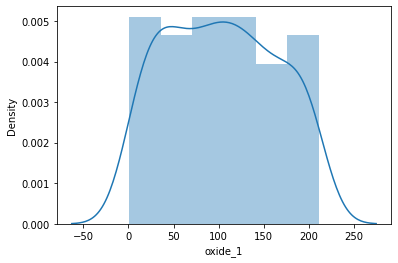

In [24]:
sns.distplot(df1["oxide_1"])
plt.show()

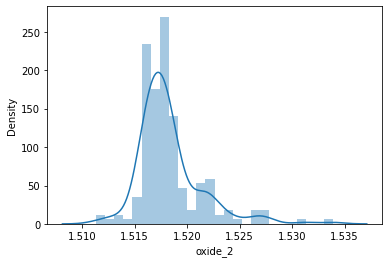

In [25]:
sns.distplot(df1["oxide_2"])
plt.show()

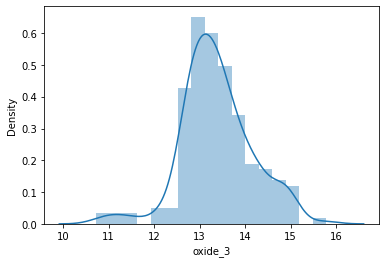

In [26]:
sns.distplot(df1["oxide_3"])
plt.show()

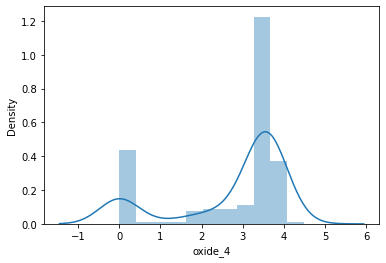

In [27]:
sns.distplot(df1["oxide_4"])
plt.show()

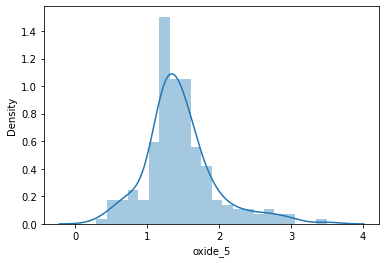

In [28]:
sns.distplot(df1["oxide_5"])
plt.show()

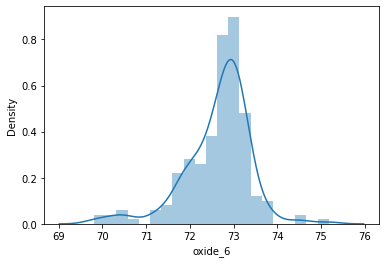

In [29]:
sns.distplot(df1["oxide_6"])
plt.show()

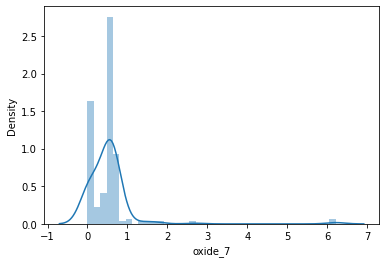

In [30]:
sns.distplot(df1["oxide_7"])
plt.show()

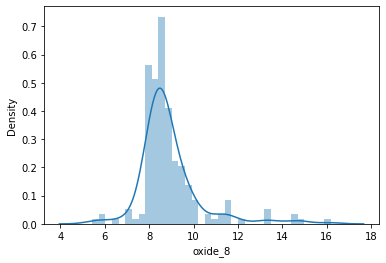

In [31]:
sns.distplot(df1["oxide_8"])
plt.show()

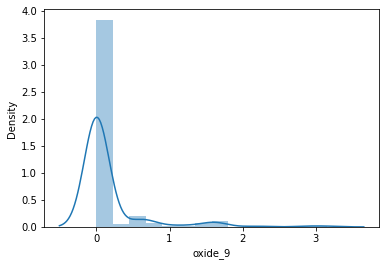

In [32]:
sns.distplot(df1["oxide_9"])
plt.show()

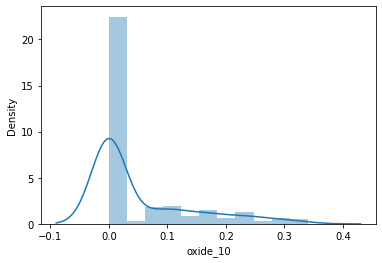

In [33]:
sns.distplot(df1["oxide_10"])
plt.show()

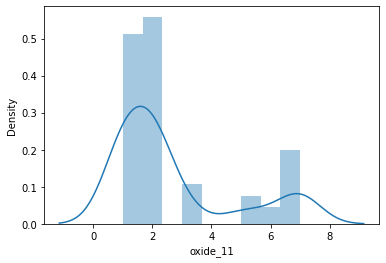

In [34]:
sns.distplot(df1["oxide_11"])
plt.show()

# **KNN Euclidean Distance**

In [37]:
x_train=df1.drop(columns=["oxide_11"])
y_train=df1["oxide_11"]
x_test=df2.drop(columns=["oxide_11"])
y_test=df2["oxide_11"]

In [38]:
model = KNeighborsClassifier(n_neighbors = 4).fit(x_train,y_train)
model

KNeighborsClassifier(n_neighbors=4)

In [39]:
yhat=model.predict(x_test)
yhat

array([1, 1, 2, 2, 2, 3, 3, 3, 3, 5, 6, 6, 6, 6, 6, 7, 7, 7])

In [40]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9948979591836735
Test set Accuracy:  0.7777777777777778


In [42]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat6 = neigh6.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.9948979591836735
Test set Accuracy:  0.7777777777777778


In [44]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
  
   #Train Model and Predict 
   neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
   yhat=neigh.predict(x_test)
   mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
 
  
   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
 
mean_acc

array([0.77777778, 0.83333333, 0.77777778, 0.77777778, 0.66666667,
       0.77777778, 0.66666667, 0.77777778, 0.61111111])

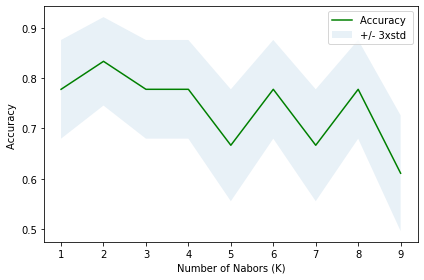

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [46]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8333333333333334 with k= 2


The best score for this data is 83.33% done by using Eucliden distance

# **KNN Manhattan Distance**

In [47]:
x_train=df1.drop(columns=["oxide_11"])
y_train=df1["oxide_11"]
x_test=df2.drop(columns=["oxide_11"])
y_test=df2["oxide_11"]

In [51]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [52]:
csr_data = csr_matrix(df1.values)

In [53]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [54]:
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [55]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


The accuracy score for the manhattan distance with the data is 73.33%